<a href="https://colab.research.google.com/github/muratcanaydogdu21/Insurance/blob/main/tf_project_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
X_train = pickle.load(open("/content/drive/MyDrive/ColabNotebooks/transfer_learning_project/pickles/X_train.pickle", "rb"))
y_train = pickle.load(open("/content/drive/MyDrive/transfer_learning_project/pickles/y_train.pickle", "rb"))

X_val = pickle.load(open("/content/drive/MyDrive/ColabNotebooks/transfer_learning_project/pickles/X_val.pickle", "rb"))
y_val = pickle.load(open("/content/drive/MyDrive/ColabNotebooks/transfer_learning_project/pickles/y_val.pickle", "rb"))

X_test = pickle.load(open("/content/drive/MyDrive/ColabNotebooks/transfer_learning_project/pickles/X_test.pickle", "rb"))
y_test = pickle.load(open("/content/drive/MyDrive/ColabNotebooks/transfer_learning_project/pickles/y_test.pickle", "rb"))

In [ ]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,
                                                     weights = 'imagenet',
                                                     input_shape = (128,128,3),
                                                     pooling="max")

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

In [ ]:
head_model = tf.keras.Model(inputs = base_model.input, outputs = predictions)

In [ ]:
head_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
history = head_model.fit(X_train, y_train, batch_size=128, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
13/13 [==============================] - 17s 202ms/step - loss: 1.9161 - accuracy: 0.5462 - val_loss: 0.5881 - val_accuracy: 0.6450
Epoch 2/25
13/13 [==============================] - 1s 71ms/step - loss: 0.4485 - accuracy: 0.7800 - val_loss: 0.1909 - val_accuracy: 0.9250
Epoch 3/25
13/13 [==============================] - 1s 66ms/step - loss: 0.1921 - accuracy: 0.9312 - val_loss: 0.1366 - val_accuracy: 0.9450
Epoch 4/25
13/13 [==============================] - 1s 65ms/step - loss: 0.1652 - accuracy: 0.9356 - val_loss: 0.1927 - val_accuracy: 0.9300
Epoch 5/25
13/13 [==============================] - 1s 71ms/step - loss: 0.1425 - accuracy: 0.9450 - val_loss: 0.1264 - val_accuracy: 0.9550
Epoch 6/25
13/13 [==============================] - 1s 66ms/step - loss: 0.1033 - accuracy: 0.9544 - val_loss: 0.1116 - val_accuracy: 0.9500
Epoch 7/25
13/13 [==============================] - 1s 66ms/step - loss: 0.1103 - accuracy: 0.9538 - val_loss: 0.1252 - val_accuracy: 0.9500
Epoch 8/25


In [ ]:
head_model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 53ms/step - loss: 0.1793 - accuracy: 0.9350


[0.17926162481307983, 0.9350000023841858]

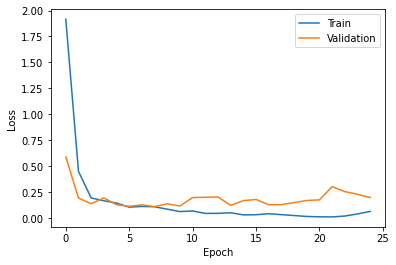

In [ ]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

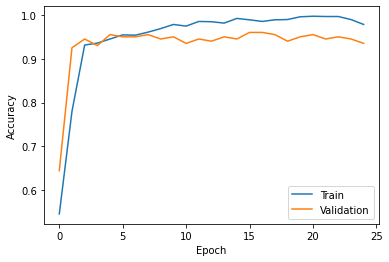

In [ ]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
head_model.save("trained_model")